In [1]:
## Analysis Target:
To find out the relationship of the students background with alcohol consumption, and find out whether there is any effect to the studies by the frequent of alcohol comsumption.

SyntaxError: invalid syntax (<ipython-input-1-e47164153ab6>, line 2)

In [2]:
## Dataset:
The dataset is obtained from the website https://www.kaggle.com/uciml/student-alcohol-consumption

There are 2 csv files of the datasets. One of them is the students' background information with Mathematic result (student-mat.csv) and the other one is the students' background information with Portugis language result (student-por.csv). 


SyntaxError: invalid syntax (<ipython-input-2-dfae6bac316c>, line 2)

In [521]:
#import pandas library as pd
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

## Read data:


### student-mat.csv

####  - Dataset Information:

In [105]:
sm_path = 'C:/Users/raffi/Documents/Python Scripts/Data Analytics group/WQD7003/student-alcohol-consumption/student-mat.csv'
sm_df = pd.read_csv(sm_path)

sm_df['subType'] = 'Math'

sm_df.info()
print(sm_df.shape)
print(len(sm_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

From this we can see that there is 395 observations and 34 columns for math students and we dont have any missing values

#### - Data:
looking at the head of the data

In [106]:
sm_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subType
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


### student-por.csv

#### Dataset Infomation:

In [107]:
sp_path = 'C:/Users/raffi/Documents/Python Scripts/Data Analytics group/WQD7003/student-alcohol-consumption/student-por.csv'
sp_df = pd.read_csv(sp_path)
sp_df['subType'] = 'Portu'
print(sp_df.info())
print((sp_df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

From this we can see that there is 649 observations and 34 columns for portuguese student and we dont have any missing values

In [108]:
sp_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subType
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Portu
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Portu
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Portu
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Portu
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Portu


## Columns information
The columns information has been described in https://www.kaggle.com/uciml/student-alcohol-consumption


## Data Preparation

### 1. Remove duplicate


In [109]:
sm_df = sm_df.drop_duplicates(["school","sex","age","address","famsize", \
              "Pstatus", "Medu","Fedu","Mjob","Fjob", \
              "reason","nursery","internet", "guardian","traveltime",\
              "studytime","failures", "schoolsup","famsup","activities",\
              "higher","romantic", "famrel","freetime","goout",\
              "Dalc","Walc","health","absences"], keep='last')

sp_df = sp_df.drop_duplicates(["school","sex","age","address","famsize", \
              "Pstatus", "Medu","Fedu","Mjob","Fjob", \
              "reason","nursery","internet", "guardian","traveltime",\
              "studytime","failures", "schoolsup","famsup","activities",\
              "higher","romantic", "famrel","freetime","goout",\
              "Dalc","Walc","health","absences"], keep='last')
print(sm_df.shape)
print(sp_df.shape)

(395, 34)
(649, 34)


After removing duplicate from both dataframe the shape of the dataframe both remain the same, hence no missing value is found.

### 2. Merging the 2 data sets (student-math.csv and student-por.csv)
#### 1. Inner join 2 datasets
To get the students who takes both math and portuguese

In [110]:
df_combine = pd.merge(sm_df, sp_df, how='inner', \
    left_on=["school","sex","age","address","famsize", \
              "Pstatus", "Medu","Fedu","Mjob","Fjob", \
              "reason","nursery","internet", "guardian","traveltime",\
              "studytime","failures", "schoolsup","famsup","activities",\
              "higher","romantic", "famrel","freetime","goout",\
              "Dalc","Walc","health","absences"], \
    right_on=["school","sex","age","address","famsize", \
              "Pstatus", "Medu","Fedu","Mjob","Fjob", \
              "reason","nursery","internet", "guardian","traveltime",\
              "studytime","failures", "schoolsup","famsup","activities",\
              "higher","romantic", "famrel","freetime","goout",\
              "Dalc","Walc","health","absences"], \
    suffixes=('_math', '_portu'))

df_combine.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G1_math,G2_math,G3_math,subType_math,paid_portu,G1_portu,G2_portu,G3_portu,subType_portu
0,GP,M,16,U,LE3,T,2,2,other,other,...,0,12,12,11,Math,no,13,12,13,Portu
1,GP,M,15,U,LE3,A,3,2,services,other,...,0,16,18,19,Math,no,15,16,17,Portu
2,GP,M,15,U,GT3,T,3,4,other,other,...,0,14,15,15,Math,no,12,12,13,Portu
3,GP,M,15,U,GT3,A,2,2,other,other,...,0,14,16,16,Math,no,14,14,15,Portu
4,GP,M,15,U,GT3,T,4,3,teacher,other,...,0,13,14,15,Math,no,12,13,14,Portu


#### 2. Outer join 2 dataset - to get all the students taking only one subject or both subjects
To get the overall students from both datasets
(the students take math only + the student take portuguese only + the student taking both subjects)

In [112]:
df_combineAll = pd.merge(sm_df, sp_df, how='outer', \
    left_on=["school","sex","age","address","famsize", \
              "Pstatus", "Medu","Fedu","Mjob","Fjob", \
              "reason","nursery","internet", "guardian","traveltime",\
              "studytime","failures", "schoolsup","famsup","activities",\
              "higher","romantic", "famrel","freetime","goout",\
              "Dalc","Walc","health","absences"], \
    right_on=["school","sex","age","address","famsize", \
              "Pstatus", "Medu","Fedu","Mjob","Fjob", \
              "reason","nursery","internet", "guardian","traveltime",\
              "studytime","failures", "schoolsup","famsup","activities",\
              "higher","romantic", "famrel","freetime","goout",\
              "Dalc","Walc","health","absences"], \
    suffixes=('_math', '_portu'))

df_combineAll.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G1_math,G2_math,G3_math,subType_math,paid_portu,G1_portu,G2_portu,G3_portu,subType_portu
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,6.0,5.0,6.0,6.0,Math,NaN,NaN,NaN,NaN,NaN
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,4.0,5.0,5.0,6.0,Math,NaN,NaN,NaN,NaN,NaN
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,10.0,7.0,8.0,10.0,Math,NaN,NaN,NaN,NaN,NaN
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,2.0,15.0,14.0,15.0,Math,NaN,NaN,NaN,NaN,NaN
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,6.0,10.0,10.0,Math,NaN,NaN,NaN,NaN,NaN


In [113]:
print(df_combine.shape)
print(df_combineAll.shape)

(85, 39)
(959, 39)


In [114]:
print(df_combine.info())
print(df_combineAll.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 39 columns):
school           85 non-null object
sex              85 non-null object
age              85 non-null int64
address          85 non-null object
famsize          85 non-null object
Pstatus          85 non-null object
Medu             85 non-null int64
Fedu             85 non-null int64
Mjob             85 non-null object
Fjob             85 non-null object
reason           85 non-null object
guardian         85 non-null object
traveltime       85 non-null int64
studytime        85 non-null int64
failures         85 non-null int64
schoolsup        85 non-null object
famsup           85 non-null object
paid_math        85 non-null object
activities       85 non-null object
nursery          85 non-null object
higher           85 non-null object
internet         85 non-null object
romantic         85 non-null object
famrel           85 non-null int64
freetime         85 non-null int64
goout

From this we can see that the students who are taking both math and portuguese dont have any missing value, but the combined datasets contain missing value but this is okay since the column containing the missing value is all the column related to the class. (i.e. students in math class will surely dont have the grade for the portugese class)

### 2. Select the required Columns

In [115]:
df_subset = df_combine.loc[ : , ["school","sex","age","address","famsize","Pstatus", \
                            "Medu","Fedu","Mjob","Fjob","reason","nursery","internet", \
                            "guardian","traveltime","studytime","failures", \
                            "schoolsup","famsup","activities","higher","romantic", \
                            "famrel","freetime","goout","Dalc","Walc","health","absences",\
                            'G1_math','G2_math','G3_math','G1_portu','G2_portu','G3_portu']]

# select alcohol consumtion and the final results of Math and Portugese
df_subAlchResult = df_subset[['sex','Dalc', 'Walc', 'G3_math','G3_portu']]
df_subAlchResult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 5 columns):
sex         85 non-null object
Dalc        85 non-null int64
Walc        85 non-null int64
G3_math     85 non-null int64
G3_portu    85 non-null int64
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


## Data Exploration

### 1. Correlationship for each numeric columns

#### a) For the students who takes 2 subjects 
The significant column having positive corelationship to the total consumption of alcohol (Talc) is 
(failure, 
gout,
absences,
health)

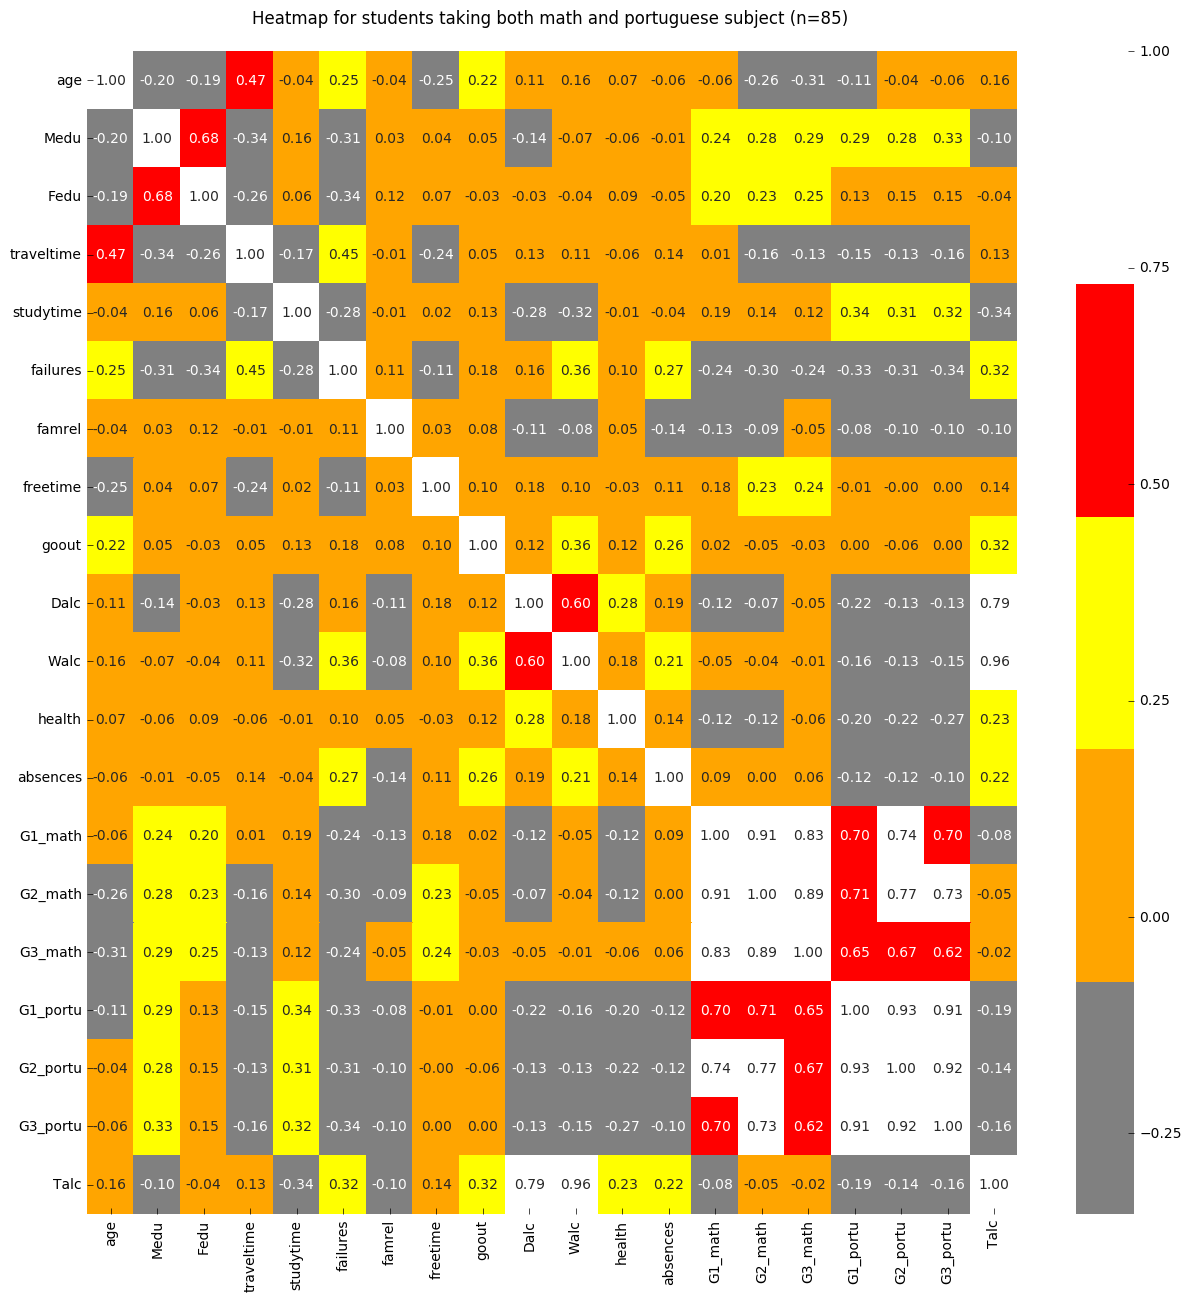

In [122]:
plt.figure(figsize=(15,15))
df_combineTotalAcl = df_combine
df_combineTotalAcl['Talc'] = df_combine['Dalc'] + df_combine['Walc']

sns.heatmap(df_combine.corr(),annot = True,fmt = ".2f",cbar = True, cmap=['grey', 'orange','yellow', 'red', 'white'])
plt.title("Heatmap for students taking both math and portuguese subject (n=85) \n")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

plt.savefig('corelationship.pdf', format='pdf' )

#### b) For all the students (taking either 1 subject or both subjects)  
The significant column having positive corelationship to the total consumption of alcohol (Talc) is (failure, gout, absences, health)

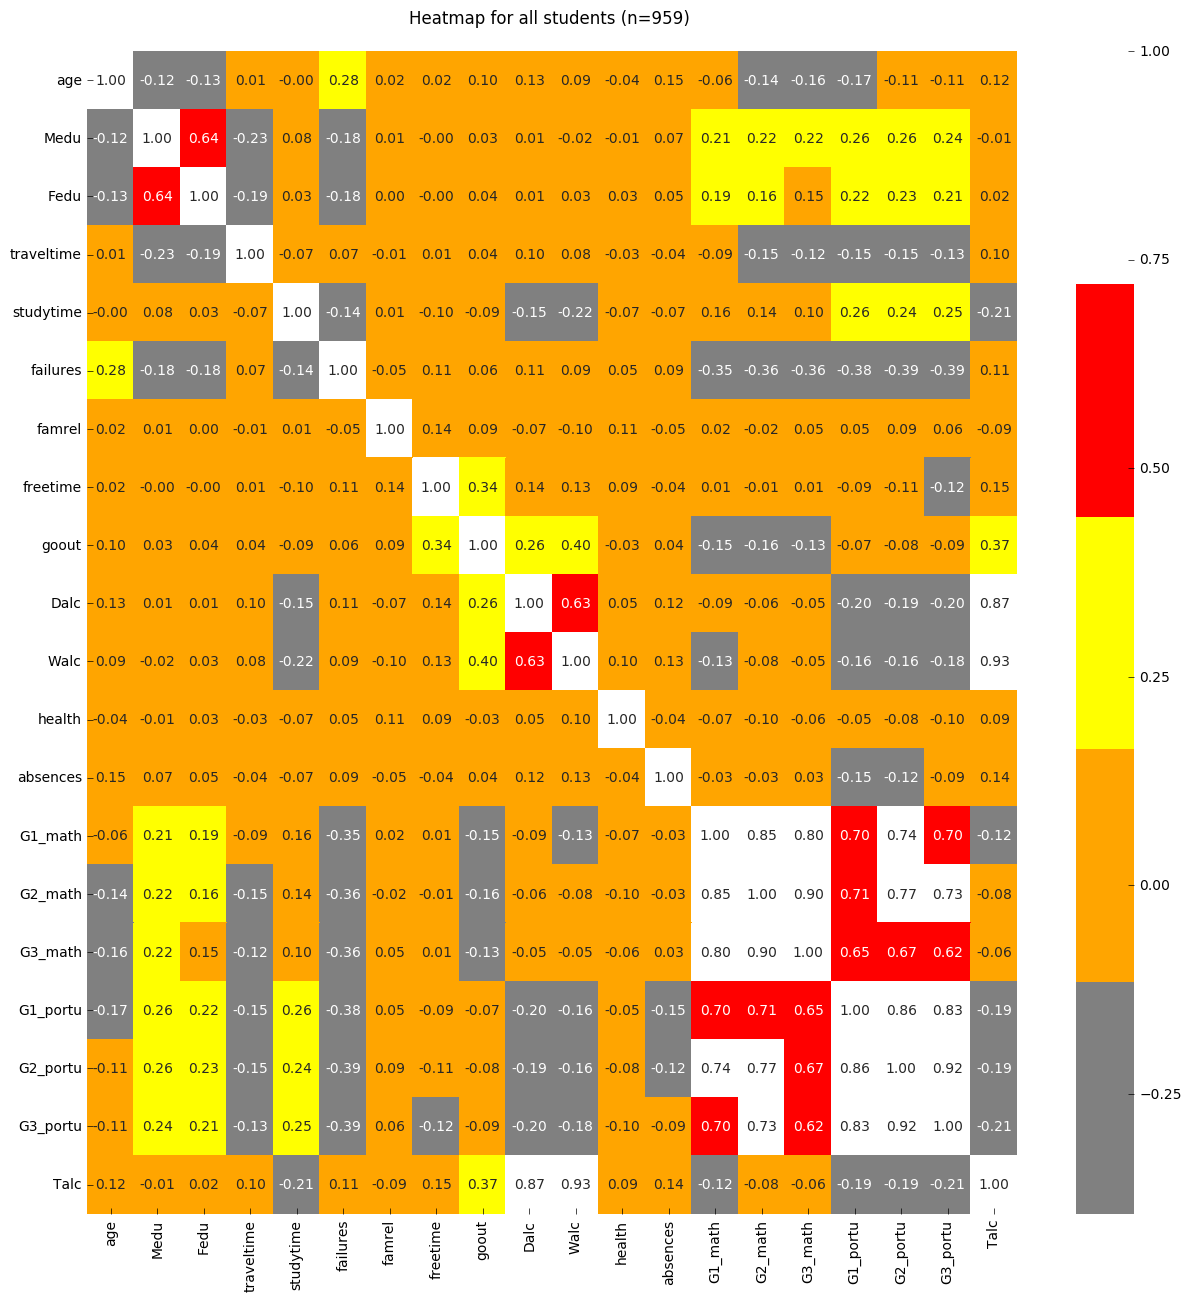

In [121]:
plt.figure(figsize=(15,15))
df_combineAllTotalAcl = df_combineAll
df_combineAllTotalAcl['Talc'] = df_combineAll['Dalc'] + df_combineAll['Walc']

sns.heatmap(df_combineAllTotalAcl.corr(),annot = True,fmt = ".2f",cbar = True, cmap=['grey', 'orange','yellow', 'red', 'white'])
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.title("Heatmap for all students (n=959) \n")
plt.savefig('corelationshipAll.pdf', format='pdf' )


From these heatmap there are several conclusion that we can get:
<br>
<br>
1) Our initial method to combine both weekdays and weekend alcohol consumption is correct (talc) since it is highly correlated to each other.
<br>
<br>
2) All of the grades are highly correlated to each other , hence we can use average (AverageGrade) to represent all of the variable (average: G1_portu, G1_math, G2_portu, G2 math etc.)
<br>
<br>
3) 'failures' is highly correlated to the Grades, and it looks like for the model building it can also act as a target hence suggest to remove as the predictor for the model building

#### Grade Before averaging it

In [130]:
df_combineAllTotalAcl.loc[:,['G1_math', 'G2_math', 'G3_math', 'G1_portu','G2_portu','G3_portu']].head()

,G1_math,G2_math,G3_math,G1_portu,G2_portu,G3_portu
0,5.0,6.0,6.0,NaN,NaN,NaN
1,5.0,5.0,6.0,NaN,NaN,NaN
2,7.0,8.0,10.0,NaN,NaN,NaN
3,15.0,14.0,15.0,NaN,NaN,NaN
4,6.0,10.0,10.0,NaN,NaN,NaN


In [132]:
df_combineAllTotalAcl['AverageGrade'] = df_combineAllTotalAcl.loc[:,['G1_math', 'G2_math', 'G3_math', 'G1_portu','G2_portu','G3_portu']].mean(axis=1,skipna=True)

#### Grade after averaging it

In [133]:
df_combineAllTotalAcl.loc[:,['G1_math', 'G2_math', 'G3_math', 'G1_portu','G2_portu','G3_portu','AverageGrade']].head()

,G1_math,G2_math,G3_math,G1_portu,G2_portu,G3_portu,AverageGrade
0,5.0,6.0,6.0,NaN,NaN,NaN,5.666667
1,5.0,5.0,6.0,NaN,NaN,NaN,5.333333
2,7.0,8.0,10.0,NaN,NaN,NaN,8.333333
3,15.0,14.0,15.0,NaN,NaN,NaN,14.666667
4,6.0,10.0,10.0,NaN,NaN,NaN,8.666667


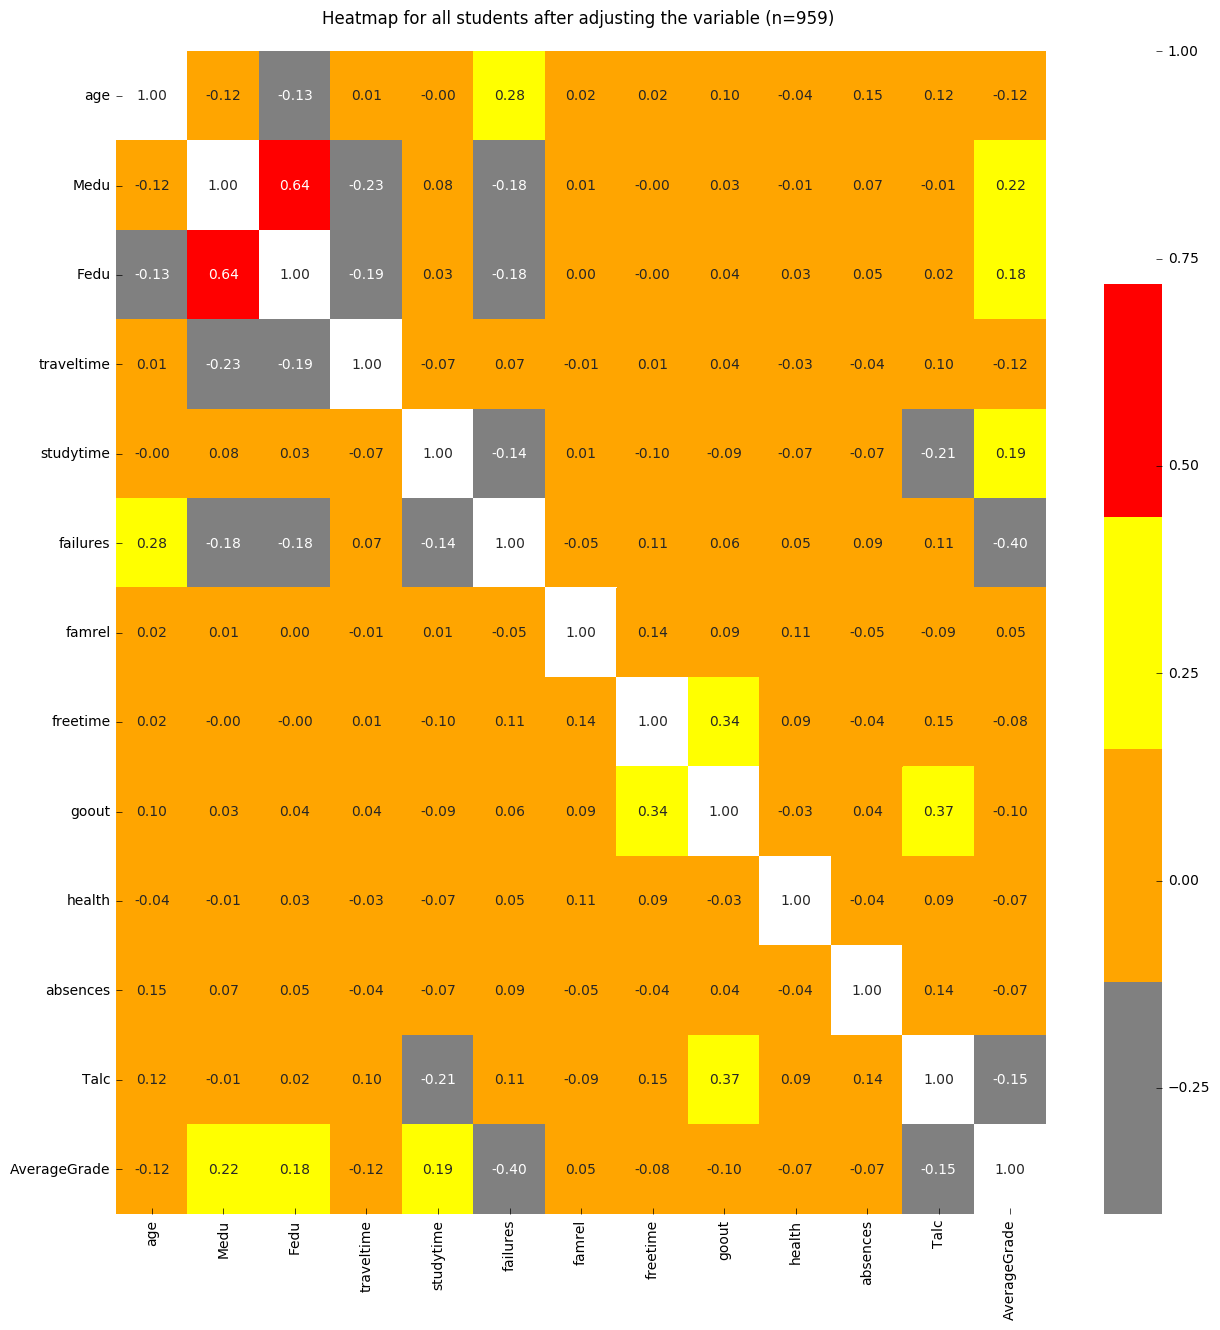

In [396]:
plt.figure(figsize=(15,15))
df_combineAllTotalAcl_new = df_combineAllTotalAcl.drop(['G1_math', 'G2_math', 'G3_math', 'G1_portu','G2_portu','G3_portu','Walc','Dalc'],axis=1)

sns.heatmap(df_combineAllTotalAcl_new.corr(),annot = True,fmt = ".2f",cbar = True, cmap=['grey', 'orange','yellow', 'red', 'white'])
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.title("Heatmap for all students after adjusting the variable (n=959) \n")
plt.savefig('corelationshipAll.pdf', format='pdf' )


### Failure vs Alcohol Consumption
As mentioned earlier, 'failure' is highly correlated to the target 'AverageGrade'. Hence let's visualise how frequent alcohol consumption to the 'failures' variable for all student and the student taking both Math and portuguese

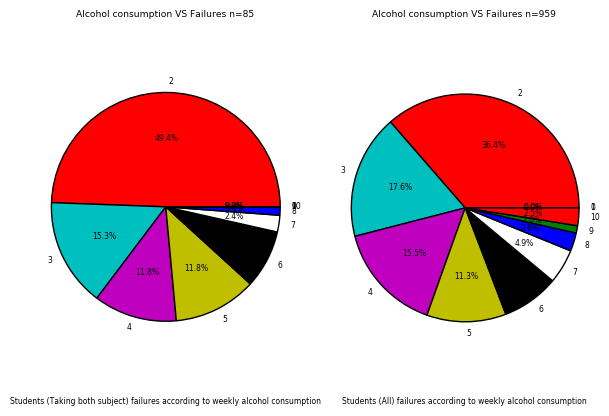

In [177]:
labels = ['0', '1','2','3','4','5','6','7','8','9','10']
explode = [0,0,0,0,0,0,0,0,0,0,0]
sizes = []
for i in range(0,11):
    sizes.append(len(df_combine[df_combine.Talc == i].failures))
total_grade = sum(sizes)
average = total_grade/float(len(df_combine))
plt.subplot(121)
plt.pie(sizes,explode=explode,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Alcohol consumption VS Failures n=85')
plt.xlabel('Students (Taking both subject) failures according to weekly alcohol consumption')


sizes2 = []

for i in range(0,11):
    sizes2.append(len(df_combineAll[df_combineAll.Talc == i].failures))
total_grade = sum(sizes2)
average = total_grade/float(len(df_combineAll))
plt.subplot(122)
plt.pie(sizes2,explode=explode,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Alcohol consumption VS Failures n=959')
plt.xlabel('Students (All) failures according to weekly alcohol consumption')
plt.rcParams['font.size'] = 5.5
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


### The attributes having significant correlation (The students who taking both subjects)
This is to further explore the attributes having high correlation to the total alcohol consumption

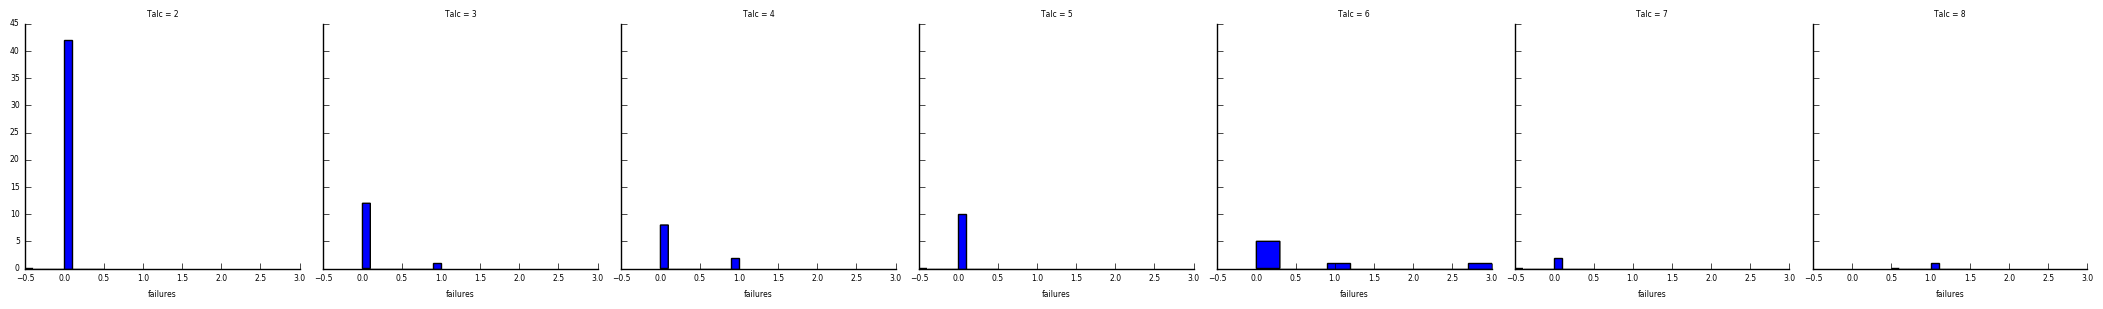

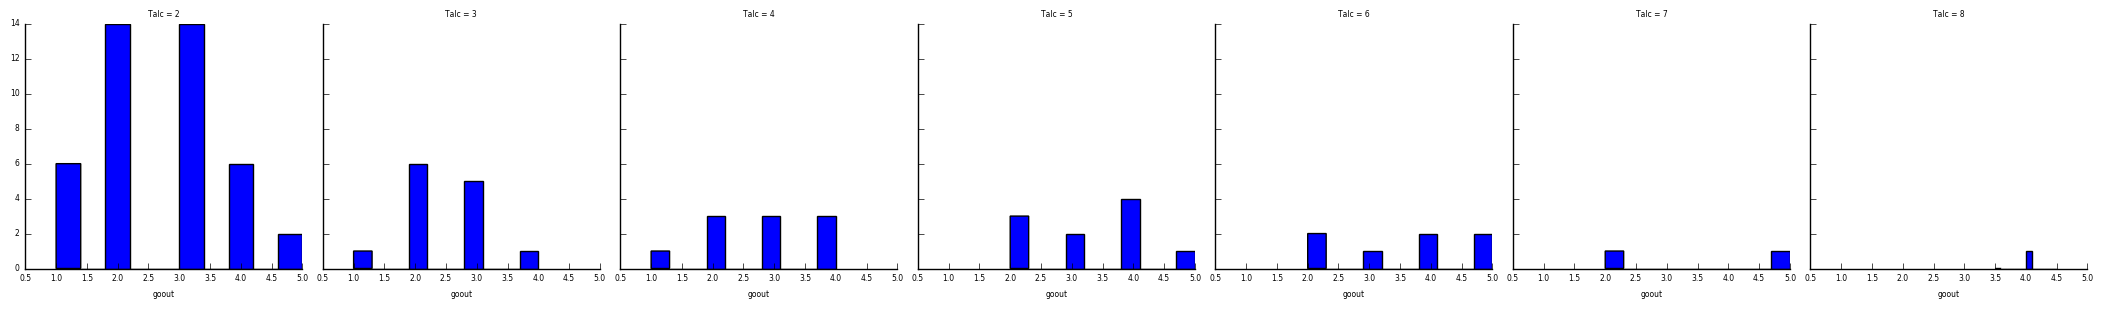

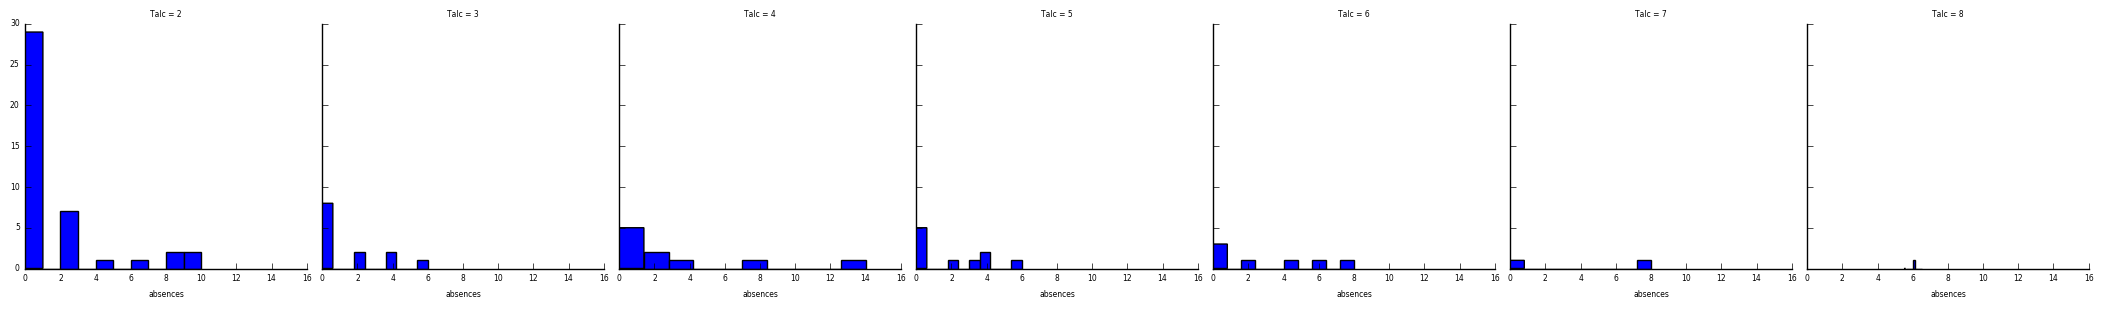

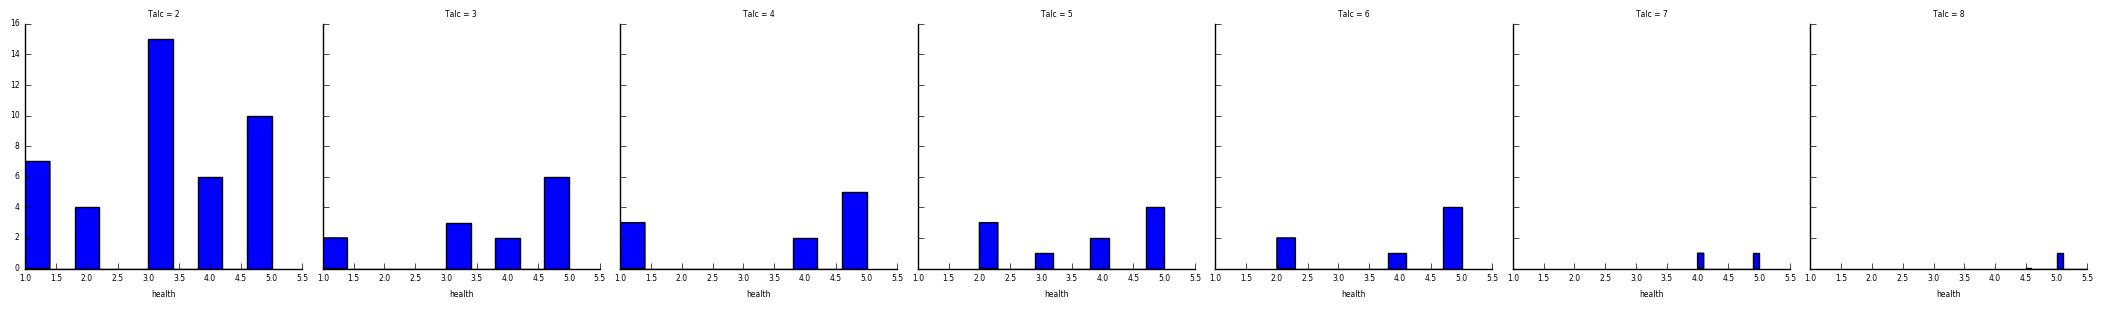

In [180]:
df_subset1 = df_combine.loc[ : , ['failures', 'goout', 'absences', 'health', 'Talc']]
g = sns.FacetGrid(df_subset1, col="Talc")
g.map(plt.hist, "failures");

g = sns.FacetGrid(df_subset1, col="Talc")
g.map(plt.hist, "goout");


g = sns.FacetGrid(df_subset1, col="Talc")
g.map(plt.hist, "absences");


g = sns.FacetGrid(df_subset1, col="Talc")
g.map(plt.hist, "health");



From this plot we can see an interesting findings, that there are several students eventhough consume more alcohol they can also have good health and can perform in several attributes. We suspect they consume healthy alcohol like Wine etc. or these students simply answering the survey question.

### The attributes having significant correlation (All the students)
To understand the overview for all student whether it is the same with the above findings

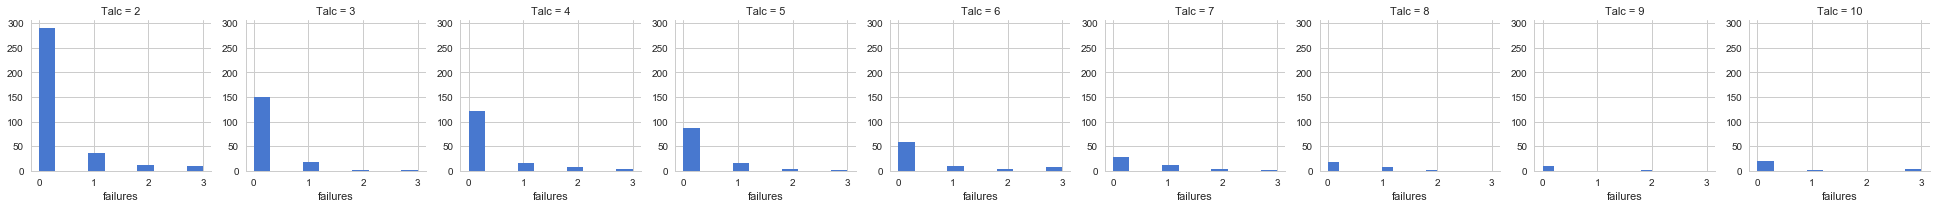

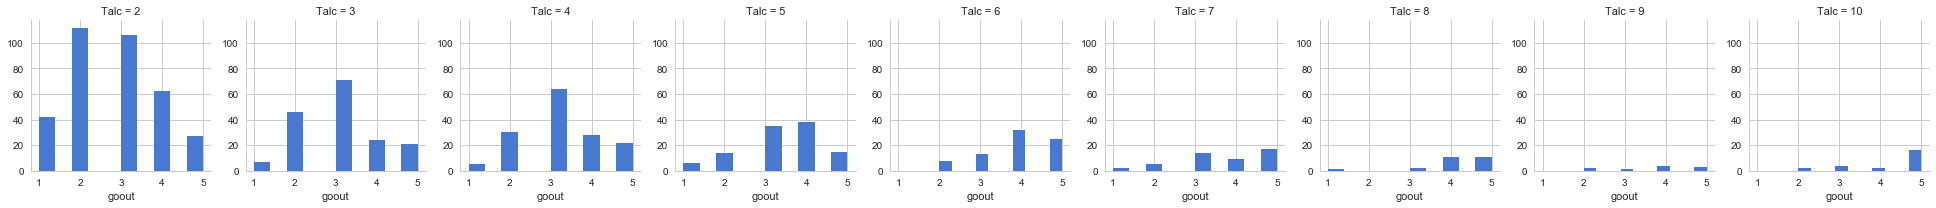

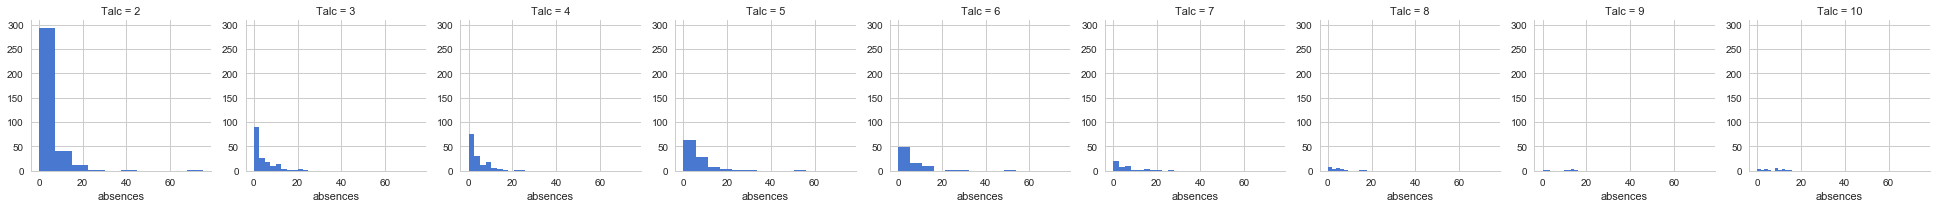

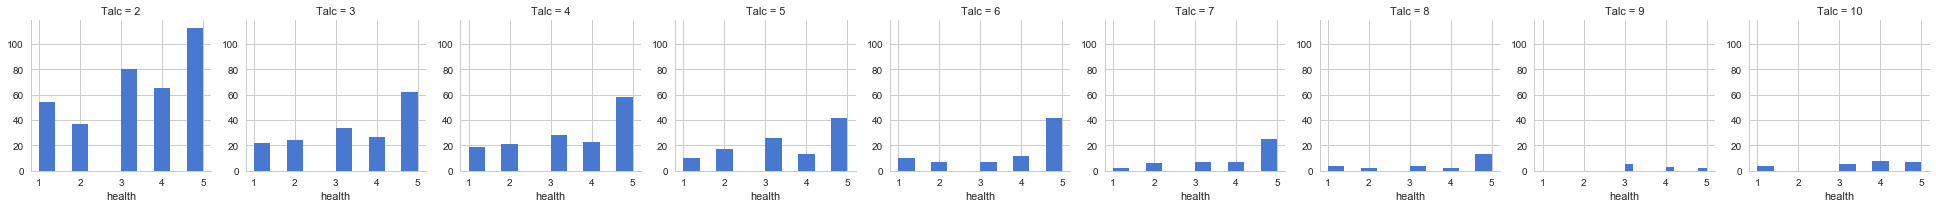

In [341]:
df_subset2 = df_combineAll.loc[ : , ['failures', 'goout', 'absences', 'health', 'Talc']]
g = sns.FacetGrid(df_subset2, col="Talc")
g.map(plt.hist, "failures");

g = sns.FacetGrid(df_subset2, col="Talc")
g.map(plt.hist, "goout");


g = sns.FacetGrid(df_subset2, col="Talc")
g.map(plt.hist, "absences");


g = sns.FacetGrid(df_subset2, col="Talc")
g.map(plt.hist, "health");



This bargraph confirm the above findings, that there are some students who can consume more alcohol and perform in class and have good health but student who consume lesser is healthier and perform better

### Family background (The students take both subjects)
This is to explore if the students alcohol consumption is related to the family background (One of our goal)

In [183]:
df_family = df_combine.loc[ : , ["famsize","Pstatus", \
                            "Medu","Fedu","Mjob","Fjob", \
                            "guardian", \
                            "famrel","Dalc","Walc"]]

df_family['Talc'] = df_family['Dalc'] + df_family['Walc']
df_family.head(10)

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famrel,Dalc,Walc,Talc
0,LE3,T,2,2,other,other,mother,4,1,1,2
1,LE3,A,3,2,services,other,mother,4,1,1,2
2,GT3,T,3,4,other,other,mother,5,1,1,2
3,GT3,A,2,2,other,other,other,4,1,1,2
4,GT3,T,4,3,teacher,other,mother,4,1,1,2
5,GT3,T,4,4,health,health,father,5,1,1,2
6,GT3,T,2,4,services,health,mother,4,1,1,2
7,GT3,T,4,4,health,services,mother,5,3,4,7
8,GT3,T,4,3,teacher,at_home,mother,4,1,1,2
9,LE3,T,3,3,other,other,mother,5,1,1,2


#### To visualise the data, the Fjob, Mjob and guardian are in string format. Hence we have to encode it

In [283]:
le = preprocessing.LabelEncoder()
le.fit(df_family.Mjob)
df_family['MjobEncode']= le.transform(df_family.Mjob)

le = preprocessing.LabelEncoder()
le.fit(df_family.Fjob)
df_family['FjobEncode']= le.transform(df_family.Fjob)

le = preprocessing.LabelEncoder()
le.fit(df_family.guardian)
df_family['GuardianEncode']= le.transform(df_family.guardian)

print("Encoded guardian data:\n"+ str(df_family.loc[:,['guardian','GuardianEncode']].drop_duplicates()))
print("Encoded Fjob data:\n"+ str(df_family.loc[:,['Fjob','FjobEncode']].drop_duplicates()))
print("Encoded Mjob data:\n"+ str(df_family.loc[:,['Mjob','MjobEncode']].drop_duplicates()))

Encoded guardian data:
  guardian  GuardianEncode
0   mother               1
3    other               2
5   father               0
Encoded Fjob data:
        Fjob  FjobEncode
0      other           2
5     health           1
7   services           3
8    at_home           0
23   teacher           4
Encoded Mjob data:
        Mjob  MjobEncode
0      other           2
1   services           3
4    teacher           4
5     health           1
11   at_home           0


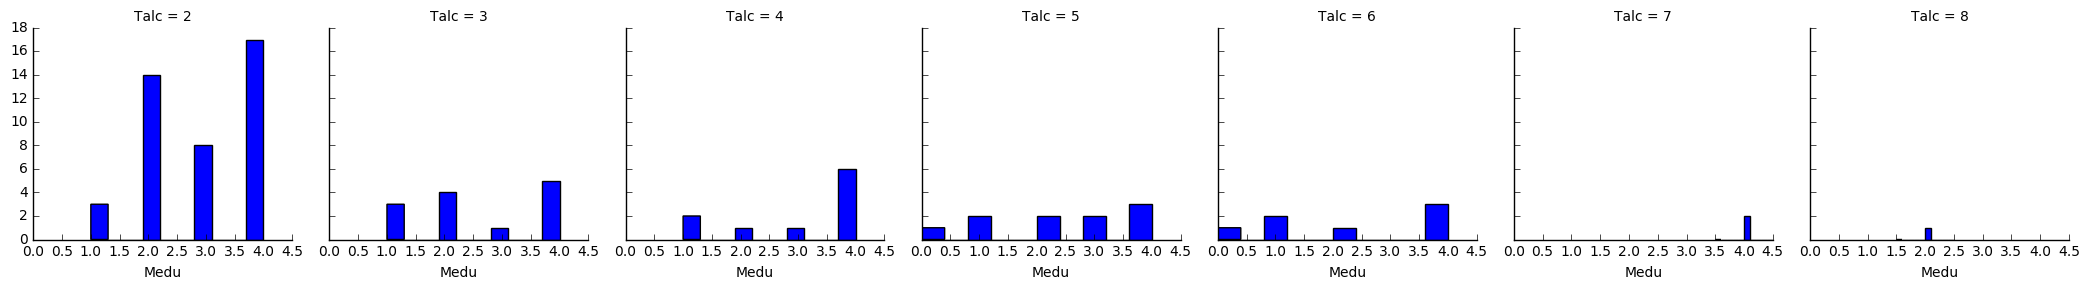

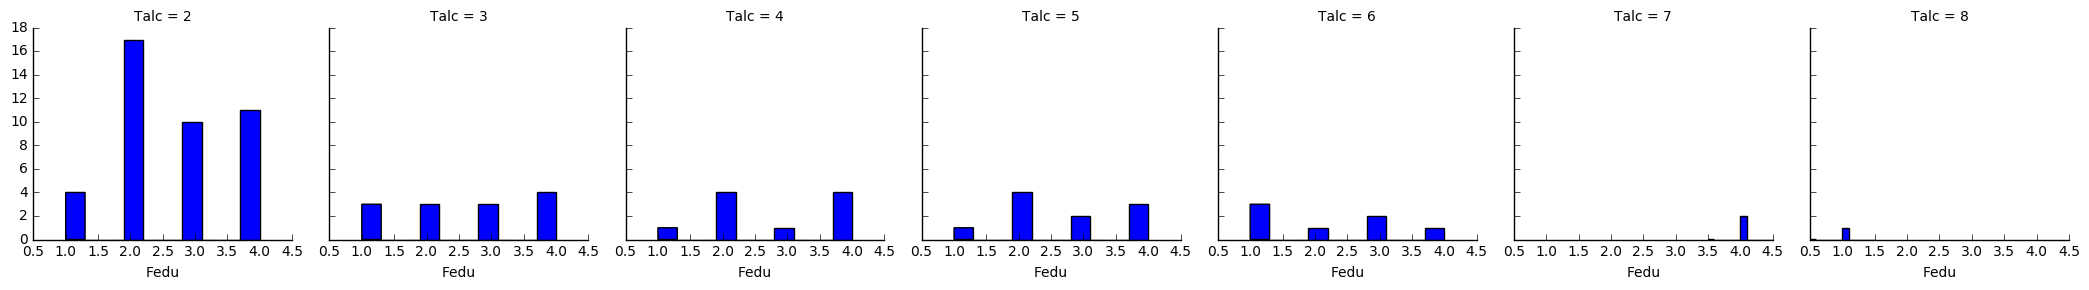

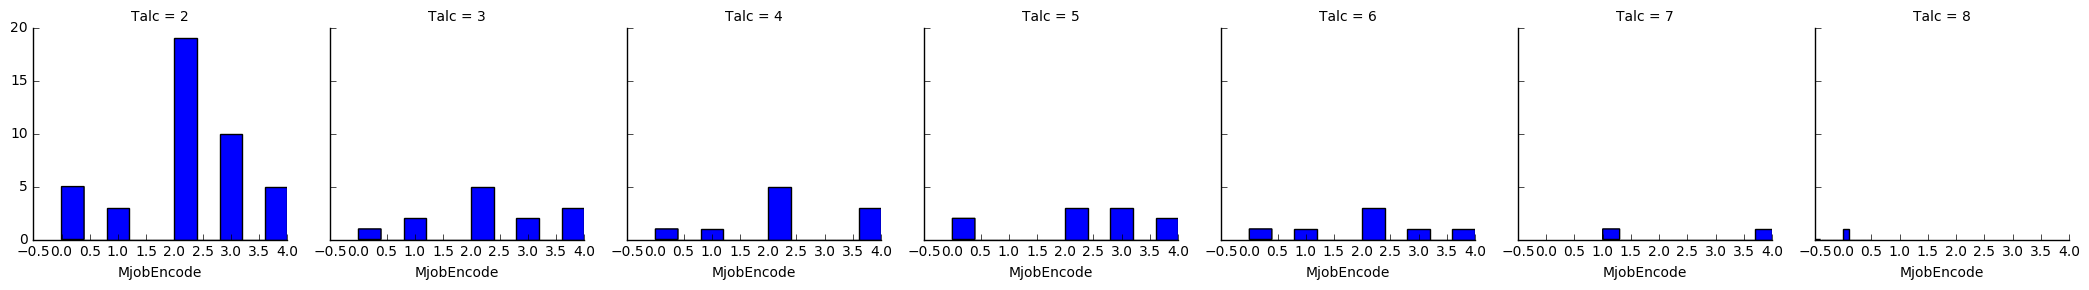

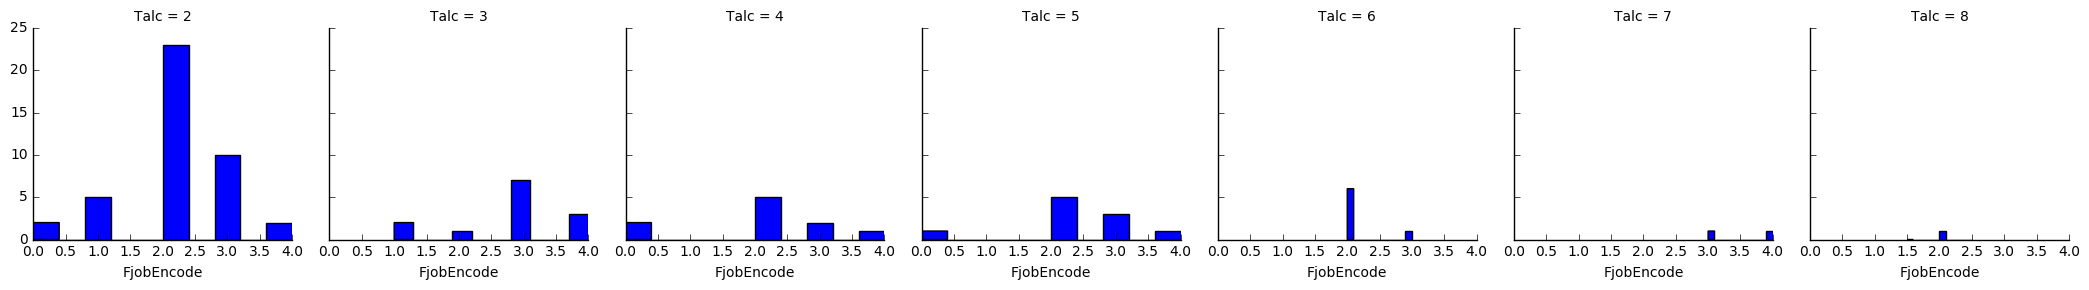

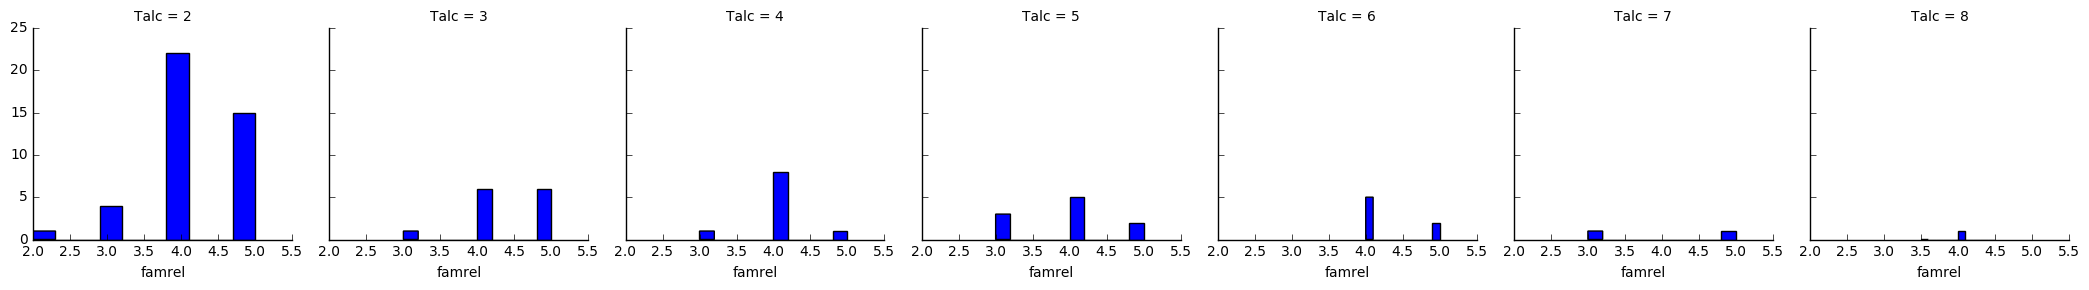

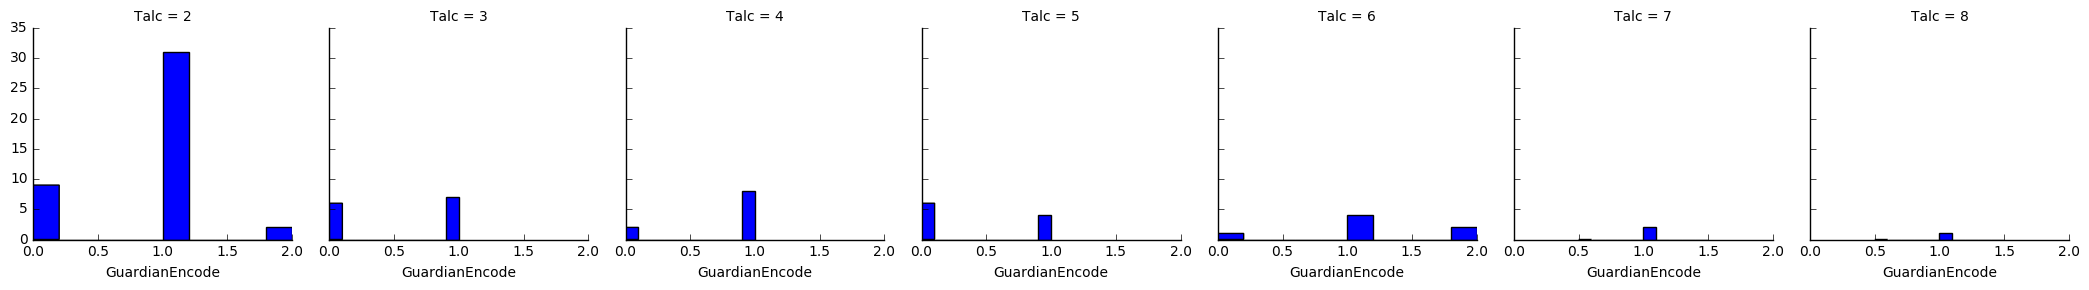

In [252]:
g = sns.FacetGrid(df_family, col="Talc")
g.map(plt.hist, "Medu");

g = sns.FacetGrid(df_family, col="Talc")
g.map(plt.hist, "Fedu");


g = sns.FacetGrid(df_family, col="Talc")
g.map(plt.hist, "MjobEncode");


g = sns.FacetGrid(df_family, col="Talc")
g.map(plt.hist, "FjobEncode");

g = sns.FacetGrid(df_family, col="Talc")
g.map(plt.hist, "famrel");

g = sns.FacetGrid(df_family, col="Talc")
g.map(plt.hist, "GuardianEncode");


### Family background (All students)

In [275]:
df_familyAll = df_combineAll.loc[ : , ["famsize","Pstatus", \
                            "Medu","Fedu","Mjob","Fjob", \
                            "guardian", \
                            "famrel","Dalc","Walc"]]

df_familyAll['Talc'] = df_family['Dalc'] + df_family['Walc']
df_familyAll.head(10)

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famrel,Dalc,Walc,Talc
0,GT3,A,4.0,4.0,at_home,teacher,mother,4.0,1.0,1.0,2.0
1,GT3,T,1.0,1.0,at_home,other,father,5.0,1.0,1.0,2.0
2,LE3,T,1.0,1.0,at_home,other,mother,4.0,2.0,3.0,2.0
3,GT3,T,4.0,2.0,health,services,mother,3.0,1.0,1.0,2.0
4,GT3,T,3.0,3.0,other,other,father,4.0,1.0,2.0,2.0
5,LE3,T,4.0,3.0,services,other,mother,5.0,1.0,2.0,2.0
6,LE3,T,2.0,2.0,other,other,mother,4.0,1.0,1.0,2.0
7,GT3,A,4.0,4.0,other,teacher,mother,4.0,1.0,1.0,7.0
8,LE3,A,3.0,2.0,services,other,mother,4.0,1.0,1.0,2.0
9,GT3,T,3.0,4.0,other,other,mother,5.0,1.0,1.0,2.0


In [286]:
le = preprocessing.LabelEncoder()
le.fit(df_familyAll.Mjob)
df_familyAll['MjobEncode']= le.transform(df_familyAll.Mjob)

le = preprocessing.LabelEncoder()
le.fit(df_familyAll.Fjob)
df_familyAll['FjobEncode']= le.transform(df_familyAll.Fjob)

le = preprocessing.LabelEncoder()
le.fit(df_familyAll.guardian)
df_familyAll['GuardianEncode']= le.transform(df_familyAll.guardian)

print("\nEncoded guardian data:\n"+ str(df_familyAll.loc[:,['guardian','GuardianEncode']].drop_duplicates()))
print("\nEncoded Fjob data:\n"+ str(df_familyAll.loc[:,['Fjob','FjobEncode']].drop_duplicates()))
print("\nEncoded Mjob data:\n"+ str(df_familyAll.loc[:,['Mjob','MjobEncode']].drop_duplicates()))


Encoded guardian data:
   guardian  GuardianEncode
0    mother               1
1    father               0
14    other               2

Encoded Fjob data:
        Fjob  FjobEncode
0    teacher           4
1      other           2
3   services           3
10    health           1
32   at_home           0

Encoded Mjob data:
        Mjob  MjobEncode
0    at_home           0
3     health           1
4      other           2
5   services           3
10   teacher           4


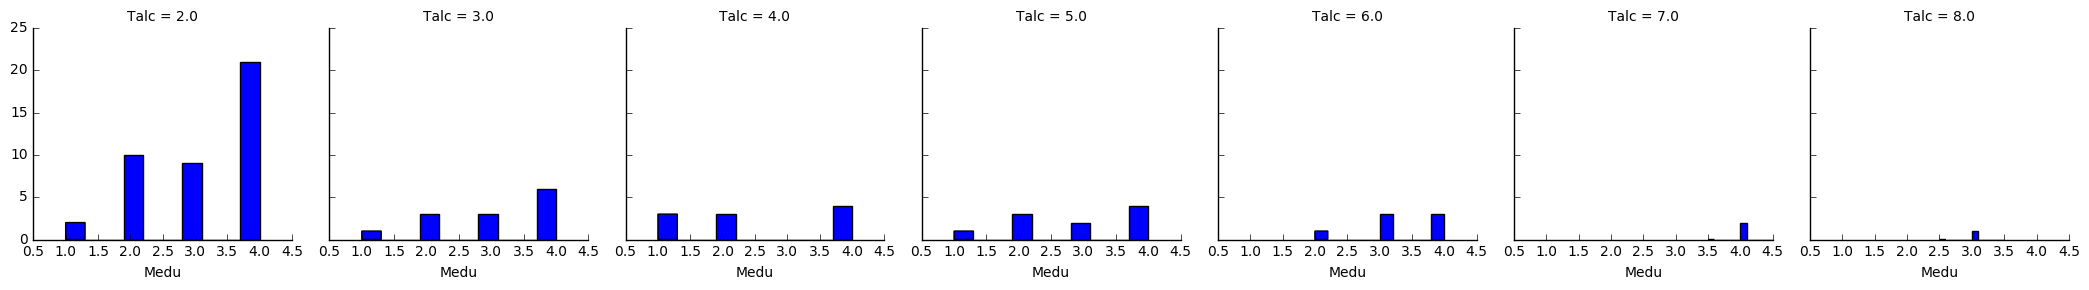

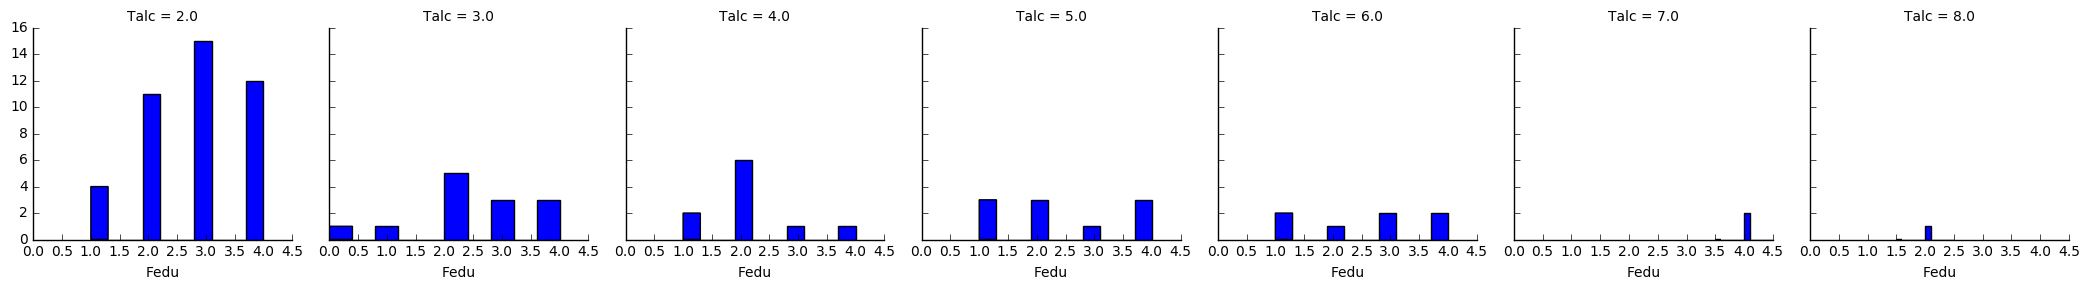

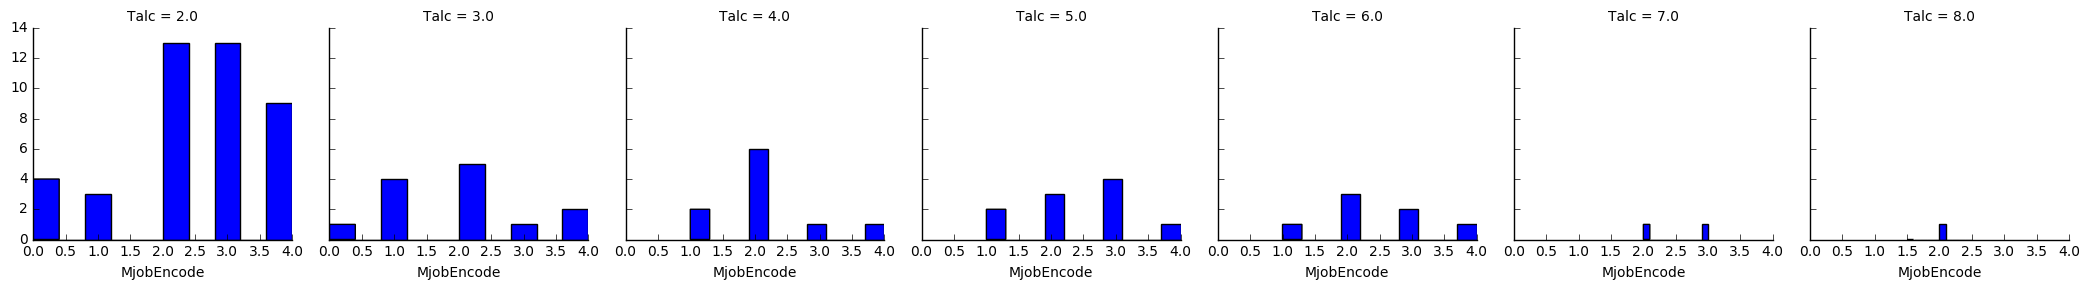

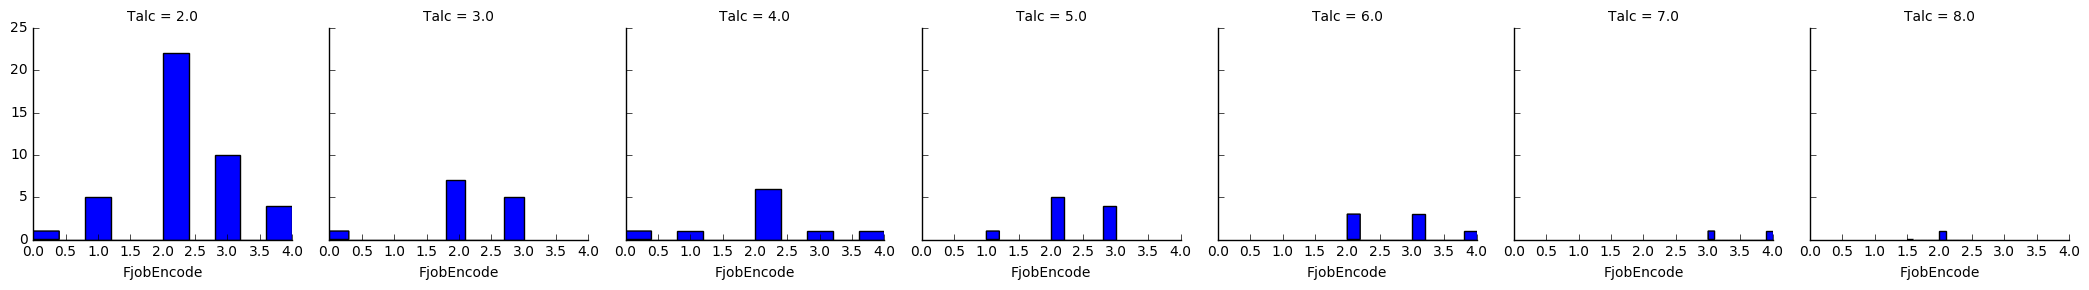

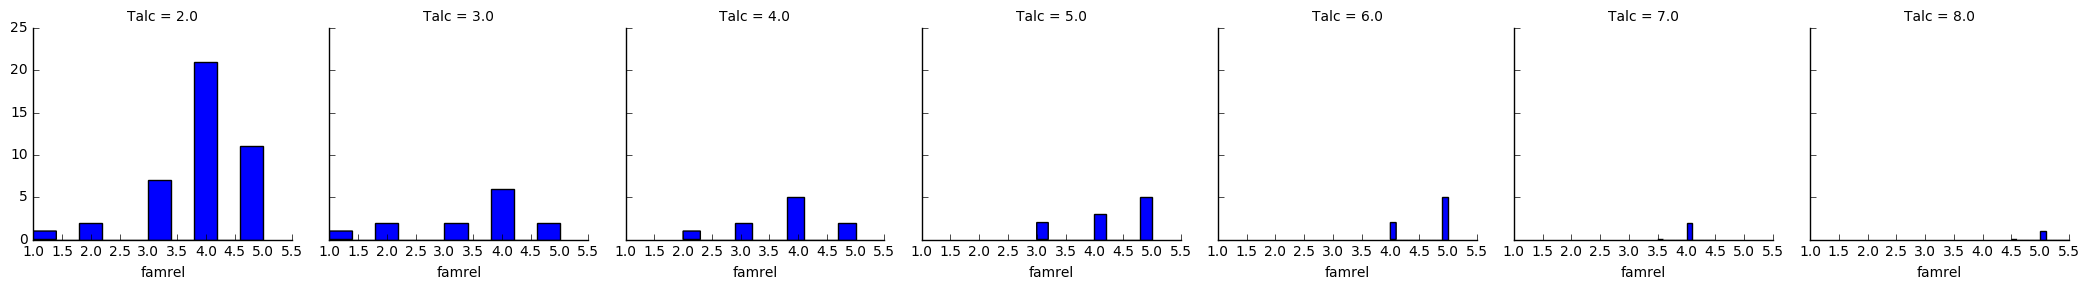

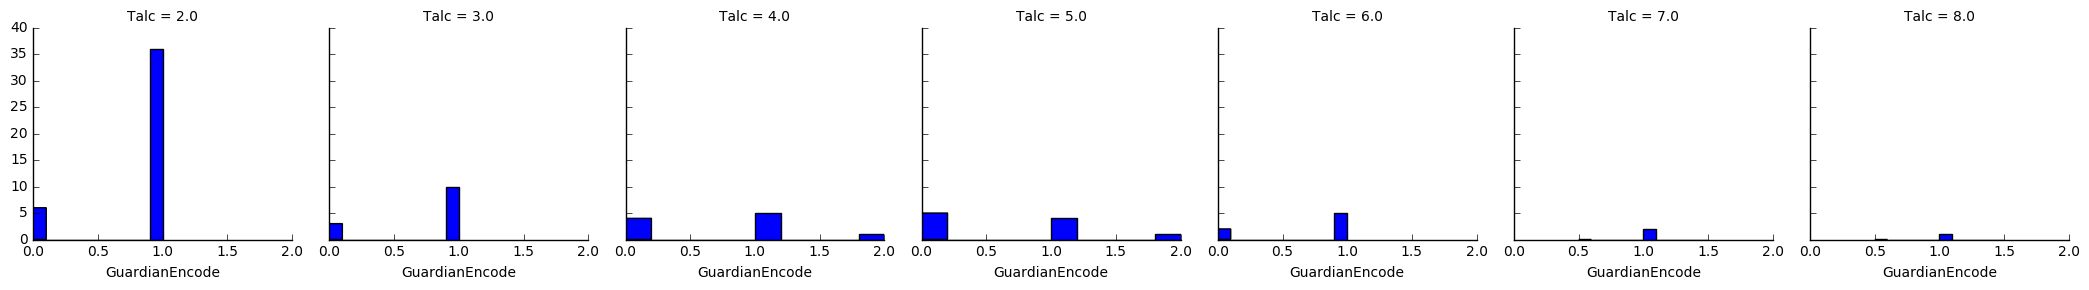

In [285]:

g = sns.FacetGrid(df_familyAll, col="Talc")
g.map(plt.hist, "Medu");

g = sns.FacetGrid(df_familyAll, col="Talc")
g.map(plt.hist, "Fedu");


g = sns.FacetGrid(df_familyAll, col="Talc")
g.map(plt.hist, "MjobEncode");


g = sns.FacetGrid(df_familyAll, col="Talc")
g.map(plt.hist, "FjobEncode");

g = sns.FacetGrid(df_familyAll, col="Talc")
g.map(plt.hist, "famrel");

g = sns.FacetGrid(df_familyAll, col="Talc")
g.map(plt.hist, "GuardianEncode");



From this data we can see that parents role are the most important part in the alcohol consumption especially the mothers. Less educated parents can be related to the frequent alcohol consumption for the students. Strong bond relationship also is important for the students for lesser in alcohol consumption.

In [287]:
df_family[df_family['Talc']== 2].head() 

#df_family['TalcCat'] = df_family[df_family['Talc']== 2]
    
df_family['TalcCat'] = df_family['Talc'] 
df_family.TalcCat[df_family['Talc'] <= 3] = 'low'
df_family.TalcCat[df_family['Talc'] == 4] = 'medium'
df_family.TalcCat[df_family['Talc'] == 5] = 'medium'
df_family.TalcCat[df_family['Talc'] == 6] = 'medium'
df_family.TalcCat[df_family['Talc'] >= 7] = 'high'
#df_family.head

F:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set o


Encoded Mjob data:
        Mjob  MjobEncode
0    at_home           0
3     health           1
4      other           2
5   services           3
10   teacher           4

Encoded Fjob data:
        Fjob  FjobEncode
0    teacher           4
1      other           2
3   services           3
10    health           1
32   at_home           0


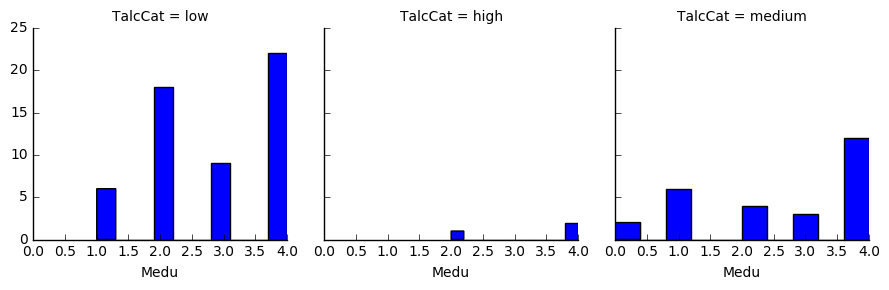

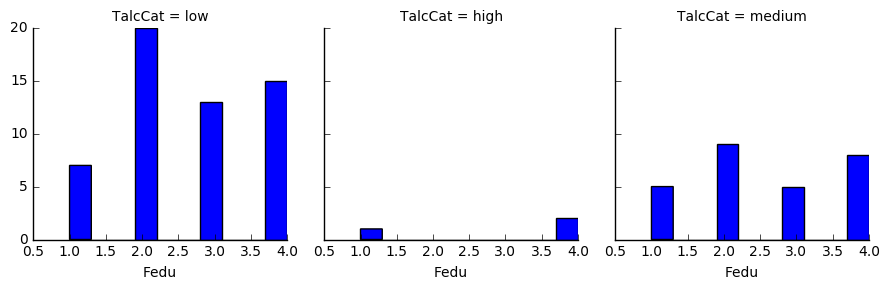

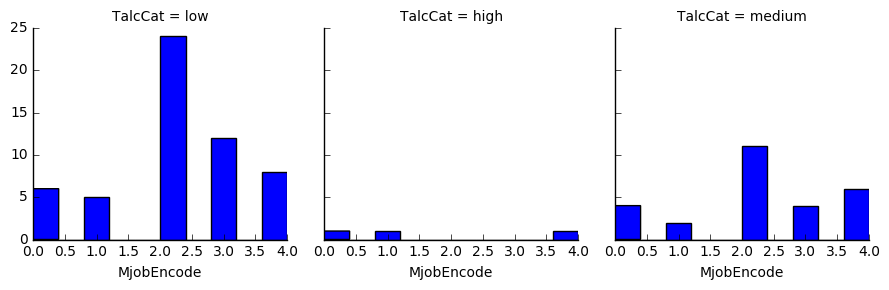

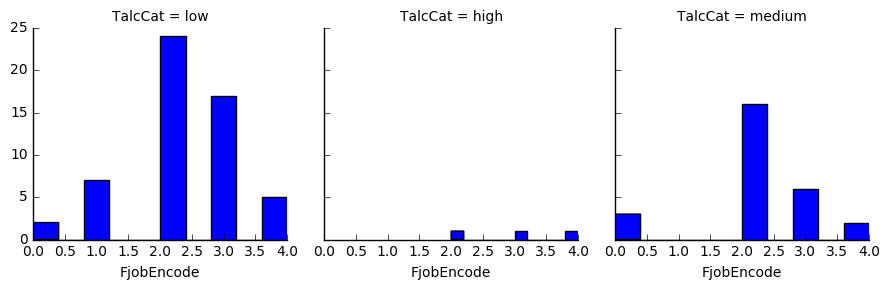

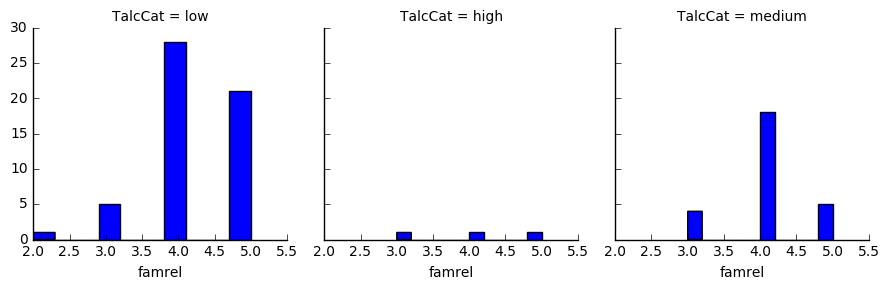

In [290]:
g = sns.FacetGrid(df_family, col="TalcCat")
g.map(plt.hist, "Medu");

g = sns.FacetGrid(df_family, col="TalcCat")
g.map(plt.hist, "Fedu");


g = sns.FacetGrid(df_family, col="TalcCat")
g.map(plt.hist, "MjobEncode");
print("\nEncoded Mjob data:\n"+ str(df_familyAll.loc[:,['Mjob','MjobEncode']].drop_duplicates()))

g = sns.FacetGrid(df_family, col="TalcCat")
g.map(plt.hist, "FjobEncode");

print("\nEncoded Fjob data:\n"+ str(df_familyAll.loc[:,['Fjob','FjobEncode']].drop_duplicates()))

g = sns.FacetGrid(df_family, col="TalcCat")
g.map(plt.hist, "famrel");





# Model

## All the students
Significant Variable to predict the alcohol consumption for students taking both subjects n=959

In [296]:
X_Att = df_combineAll.loc[ : , ["studytime", "goout", "health", "absences", "Dalc", 'Walc']]
X_Att['TalcCat'] = X_Att['Dalc'] + X_Att['Walc']
X_Att.TalcCat[(X_Att['Dalc'] + X_Att['Walc']) >= 4] = 'high'
X_Att.TalcCat[(X_Att['Dalc'] + X_Att['Walc']) <= 3] = 'low'

Y_Att = X_Att.loc[:, ["TalcCat"]]

X_Att2 = X_Att.drop(["Dalc", "Walc", "TalcCat"], axis = 1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_Att2, Y_Att,random_state=1)

model = GaussianNB()  
model.fit(Xtrain, ytrain) 
y_model = model.predict(Xtest)  
accuracy_score(ytest, y_model)


F:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6875

In [297]:
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(Xtrain, ytrain)
y_model2 = model2.predict(Xtest)

accuracy_score(ytest, y_model2)


F:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


0.5541666666666667

## The students takes both subjects 
Significant Variable to predict the alcohol consumption for students taking both subjects n=85

In [298]:
X_Att = df_combine.loc[ : , ["studytime", "goout", "health", "absences", "Dalc", 'Walc']]
X_Att['TalcCat'] = X_Att['Dalc'] + X_Att['Walc']
X_Att.TalcCat[(X_Att['Dalc'] + X_Att['Walc']) >= 4] = 'high'
X_Att.TalcCat[(X_Att['Dalc'] + X_Att['Walc']) <= 3] = 'low'

Y_Att = X_Att.loc[:, ["TalcCat"]]

X_Att2 = X_Att.drop(["Dalc", "Walc", "TalcCat"], axis = 1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_Att2, Y_Att,random_state=1)

model = GaussianNB()  
model.fit(Xtrain, ytrain) 
y_model = model.predict(Xtest)  
accuracy_score(ytest, y_model)

F:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.81818181818181823

In [299]:
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(Xtrain, ytrain)
y_model2 = model2.predict(Xtest)

accuracy_score(ytest, y_model2)



F:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


0.54545454545454541

## Summary

As we can see the model built on smaller datasets perform well to predict the students alcohol consumption. With 81% accuracy we can say that this model is built to focus on the students taking more than 1 subjects for their alcohol consumption. If it's possible we would like to try more on the students who are taking more than 1 subjects to test our model

# Model 2

## All students 
Now we are trying to see whether alcohol consumption can effect to the students' grade performance 

In [527]:
 df_combineAllTotalAcl_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 33 columns):
school           959 non-null object
sex              959 non-null object
age              959 non-null float64
address          959 non-null object
famsize          959 non-null object
Pstatus          959 non-null object
Medu             959 non-null float64
Fedu             959 non-null float64
Mjob             959 non-null object
Fjob             959 non-null object
reason           959 non-null object
guardian         959 non-null object
traveltime       959 non-null float64
studytime        959 non-null float64
failures         959 non-null float64
schoolsup        959 non-null object
famsup           959 non-null object
paid_math        395 non-null object
activities       959 non-null object
nursery          959 non-null object
higher           959 non-null object
internet         959 non-null object
romantic         959 non-null object
famrel           959 non-null float64


Since some of the variable are in string format, hence we have to change the column which data type is an object to Encode like we did previously.

In [468]:
 df_combineAllTotalAcl_model= df_combineAllTotalAcl_new.loc[ : , ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences','Talc','AverageGrade']]
list_columns = df_combineAllTotalAcl_new.select_dtypes(include=['object']).columns.drop(['subType_math','subType_portu','paid_math','paid_portu'])

In [469]:
for l in list_columns:  
        le = preprocessing.LabelEncoder()
        le.fit(df_combineAllTotalAcl_model[l])
        df_combineAllTotalAcl_model[l] = le.transform(df_combineAllTotalAcl_model[l])
    
    
df_combineAllTotalAcl_model.info()        
#le = preprocessing.LabelEncoder()
#le.fit(df_familyAll.Fjob)
#df_familyAll['FjobEncode']= le.transform(df_familyAll.Fjob)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 29 columns):
school          959 non-null int64
sex             959 non-null int64
age             959 non-null float64
address         959 non-null int64
famsize         959 non-null int64
Pstatus         959 non-null int64
Medu            959 non-null float64
Fedu            959 non-null float64
Mjob            959 non-null int64
Fjob            959 non-null int64
reason          959 non-null int64
guardian        959 non-null int64
traveltime      959 non-null float64
studytime       959 non-null float64
failures        959 non-null float64
schoolsup       959 non-null int64
famsup          959 non-null int64
activities      959 non-null int64
nursery         959 non-null int64
higher          959 non-null int64
internet        959 non-null int64
romantic        959 non-null int64
famrel          959 non-null float64
freetime        959 non-null float64
goout           959 non-null float64
he

In [571]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

X_Att3 = df_combineAllTotalAcl_model.loc[ : , ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences','Talc']]
                                         
Y_Att3 = df_combineAllTotalAcl_model.loc[ : , ['AverageGrade']]


Xtrain, Xtest, ytrain, ytest = train_test_split(X_Att3, Y_Att3,random_state=1)

modelrf = RandomForestRegressor(n_estimators=500,random_state=4543)
modelrf.fit(Xtrain, ytrain)
y_model = modelrf.predict(Xtest)

test_score = r2_score(ytest, y_model)
spearman = spearmanr( ytest, y_model)

print('Test data R-2 score:'+ str(test_score))
print( 'Test data Pearson correlation:' + str(spearman[0] ))

F:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test data R-2 score:0.0746309655968
Test data Pearson correlation:0.372247681295


In [573]:
from sklearn.model_selection import cross_val_score
modelrf = RandomForestRegressor(n_estimators=500,random_state=4543)
scores = cross_val_score(modelrf, X_Att3, Y_Att3, cv=5)
scores.mean()                                              

F:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConvers

0.083157741764432427

In [574]:
X_Att4 = df_combineAllTotalAcl_model.loc[ : , ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences','Talc']]
                                         
Y_Att4 = df_combineAllTotalAcl_model.loc[ : , ['AverageGrade']]


Xtrain, Xtest, ytrain, ytest = train_test_split(X_Att4, Y_Att4,random_state=1)

modellm = LinearRegression()
modellm.fit(Xtrain, ytrain)
y_model = modellm.predict(Xtest)

test_score = r2_score(ytest, y_model)
spearman = spearmanr( ytest, y_model)

print('Test data R-2 score:'+ str(test_score))
print( 'Test data Pearson correlation:' + str(spearman[0] ))

Test data R-2 score:0.12083987165
Test data Pearson correlation:0.435221593067


In [576]:
from sklearn.model_selection import cross_val_score
modellm = LinearRegression()
scores = cross_val_score(modellm, X_Att4, Y_Att4, cv=5)
scores.mean()  

0.030034407251377425

As we can see, both linear model and Random forest regression perform very badly to predict the students grade performance from the alcohol consumption and other variables

# Summary

Eventhough Randomforest got the lowest score from our model accuray R^2, but from K-fold cross validation it actually performs better than our linear model. Hence, we would like to explore more on this

Feature ranking:
1. feature 25 (0.124095)	absences
2. feature 18 (0.073242)	higher
3. feature 6 (0.064903)	Medu
4. feature 23 (0.059985)	goout
5. feature 26 (0.058663)	Talc
6. feature 2 (0.053933)	age
7. feature 10 (0.049378)	reason
8. feature 24 (0.043764)	health
9. feature 13 (0.041945)	studytime
10. feature 21 (0.040332)	famrel
11. feature 22 (0.040036)	freetime
12. feature 7 (0.039321)	Fedu
13. feature 9 (0.036665)	Fjob
14. feature 8 (0.035725)	Mjob
15. feature 12 (0.027749)	traveltime
16. feature 14 (0.026401)	schoolsup
17. feature 11 (0.023080)	guardian
18. feature 15 (0.020959)	famsup
19. feature 0 (0.020333)	school
20. feature 19 (0.019470)	internet
21. feature 16 (0.018671)	activities
22. feature 3 (0.017026)	address
23. feature 4 (0.014719)	famsize
24. feature 20 (0.014294)	romantic
25. feature 1 (0.013743)	sex
26. feature 17 (0.011865)	nursery
27. feature 5 (0.009706)	Pstatus


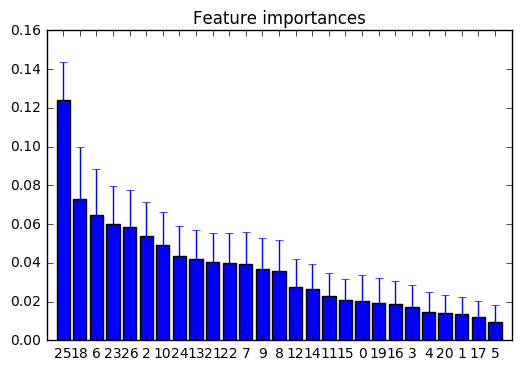

In [570]:
importances = modelrf.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelrf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Xtest.shape[1]):
    print("%d. feature %d (%f)\t" % (f + 1, indices[f], importances[indices[f]]) + Xtest.columns[indices[f]])
    #print(Xtest.columns[indices[f]])
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Xtest.shape[1]), importances[indices],
       color="blue", yerr=std[indices], align="center")
plt.xticks(range(Xtest.shape[1]), indices)
plt.xlim([-1, Xtest.shape[1]])
plt.show()

As we can see, the absence is the best predictor for the students grade performance and not alcohol, and we can say that this is actually quite true; If the students arent' able to come to class then it will be hard for them to get good grades. Alcohol consumption rank at 4 in our Random Forest model. 'Higher' actually comes at number two. which we found it can be true since students who want to pursue higher education will strive more to perform on their tests which leads to good grades. Supprisingly mothers' education comes at number 3 for predicting students' grade.
<br>
<br>
In conclusion, this model may perform well on other countries data but may not perform well in Malaysia to predict students' alcohol consumption. Maybe in future if we are able to have Malaysian students survey we can actually ask for more detailed feature that can improve our model, like how teacher evaluate the students' participation in class and how is the homework submission etc. 